In [10]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Flatten, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset

In [19]:

dataset = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = dataset.load_data()
x_train,x_test = x_train/255.0, x_test/255.0

In [20]:
x_train.shape, x_test.shape #NxTxD

((60000, 28, 28), (10000, 28, 28))

#Model instantiate

In [27]:
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)
model = Model(i,x)

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Fit and plot

In [29]:
r = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 91s 47ms/step - loss: 0.3305 - accuracy: 0.8934 - val_loss: 0.1206 - val_accuracy: 0.9640
Epoch 2/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.1025 - accuracy: 0.9696 - val_loss: 0.0853 - val_accuracy: 0.9732
Epoch 3/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0692 - accuracy: 0.9793 - val_loss: 0.0749 - val_accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0555 - accuracy: 0.9827 - val_loss: 0.0571 - val_accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0446 - accuracy: 0.9863 - val_loss: 0.0525 - val_accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 93s 49ms/step - loss: 0.0382 - accuracy: 0.9887 - val_loss: 0.0516 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0319 - accuracy: 0.9898 - val_loss: 0.0537 -

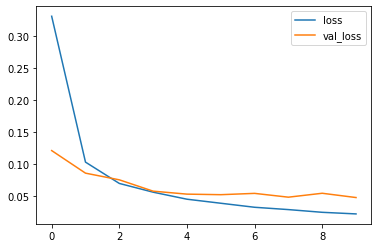

In [30]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


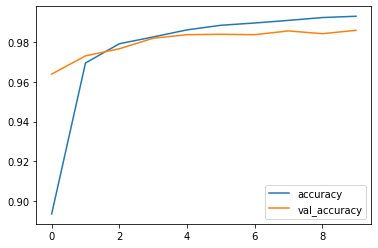

In [31]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


Conclusion: After just 10 epochs we get 99% accuracy. Thus, NN appears to generalize well. 
Note: Length of sequence = 28
      long distance problem
      

In [42]:
p_test = model.predict(x_test)
p_test

313/313 [==============================] - 6s 18ms/step


array([[1.9811557e-06, 4.4071762e-06, 4.6666182e-06, ..., 9.9994844e-01,
        3.3804449e-07, 1.2400635e-05],
       [8.9317285e-07, 5.5125824e-06, 9.9998397e-01, ..., 2.2711965e-06,
        3.2287076e-06, 1.3413995e-08],
       [5.9016943e-06, 9.9977756e-01, 1.6682243e-05, ..., 7.6607139e-05,
        2.6088639e-05, 1.7753364e-05],
       ...,
       [5.7689613e-07, 8.0965647e-06, 3.4962616e-06, ..., 2.4127750e-05,
        1.6870088e-05, 3.8608283e-05],
       [1.0214477e-06, 3.3915470e-07, 6.9190855e-07, ..., 3.7895020e-07,
        1.2215038e-04, 4.9475778e-07],
       [2.1716645e-05, 4.4080211e-06, 5.3376443e-06, ..., 2.2797383e-07,
        1.6753451e-05, 2.6119162e-07]], dtype=float32)

In [43]:
p_test=p_test.argmax(axis=1)
p_test

array([7, 2, 1, ..., 4, 5, 6])

#Confusion Matrix

313/313 [==============================] - 6s 17ms/step


Text(69.0, 0.5, 'true value')

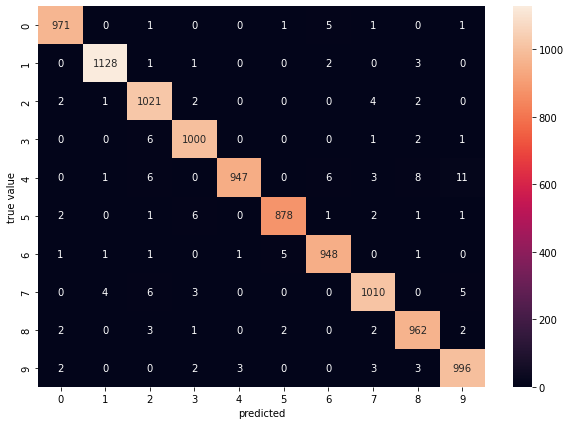

In [34]:
import seaborn as sn
cm = tf.math.confusion_matrix(y_test,model.predict(x_test).argmax(axis=1))
#.argmax(axis=1) is converting the output probabilities of the model into class predictions (i.e., selecting the class with the highest probability for each input).
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('true value')

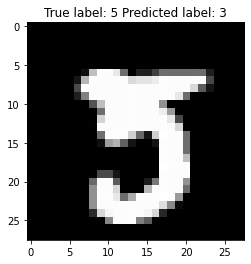

In [40]:
#lets show some misclassified samples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label: %s Predicted label: %s' %(y_test[i],p_test[i]));